In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import string
import re
import operator
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from nltk.stem.snowball import SnowballStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Phase 1 - Cleaning

In [39]:
########################## Function for Reading Review Files
def read(path,col_name):
    all_files = glob.glob(os.path.join(path, '*.txt'))
    list1 = []
    for f in all_files:
        file = open(f,'r',encoding="utf8").readlines()
        list1.append(file)
    return pd.DataFrame({col_name:list1})

In [14]:
train_pos = read('C:\\Users\\Jatin\\Desktop\\NLP\\aclImdb_v1\\aclImdb\\train\\pos', 'reviews')

In [15]:
train_pos['Sentiment'] = 1

In [16]:
train_neg = read('C:\\Users\\Jatin\\Desktop\\NLP\\aclImdb_v1\\aclImdb\\train\\neg', 'reviews')

In [17]:
train_neg['Sentiment'] = 0

In [7]:
train_pos.head()

,reviews,Sentiment
0,[Bromwell High is a cartoon comedy. It ran at ...,1
1,[Homelessness (or Houselessness as George Carl...,1
2,[Brilliant over-acting by Lesley Ann Warren. B...,1
3,[This is easily the most underrated film inn t...,1
4,[This is not the typical Mel Brooks film. It w...,1


In [8]:
train_neg.head()

,reviews,Sentiment
0,[Story of a man who has unnatural feelings for...,0
1,[Airport '77 starts as a brand new luxury 747 ...,0
2,[This film lacked something I couldn't put my ...,0
3,"[Sorry everyone,,, I know this is supposed to ...",0
4,[When I was little my parents took me along to...,0


In [18]:
df_train = pd.concat([train_pos,train_neg], sort=False).sample(frac=1).reset_index(drop=True)
df_train['set'] = 'Train'
df_train.head()

,reviews,Sentiment,set
0,[An anthology is always risky business and I t...,0,Train
1,[This is the best movie I've come across in a ...,1,Train
2,[Jude Law gives his all in this beautifully fi...,0,Train
3,"[I saw this film opening weekend in Australia,...",0,Train
4,[Watching it now it's still as skanky and sexi...,0,Train


In [19]:
test_pos = read('C:\\Users\\Jatin\\Desktop\\NLP\\aclImdb_v1\\aclImdb\\test\\pos','reviews')
test_neg = read('C:\\Users\\Jatin\\Desktop\\NLP\\aclImdb_v1\\aclImdb\\test\\neg','reviews')

In [20]:
test_pos['Sentiment'] = 1
test_neg['Sentiment'] = 0

In [21]:
df_test = pd.concat([test_pos,test_neg], sort=False).sample(frac=1).reset_index(drop=True)
df_test['set'] = 'Test'

In [18]:
################################### Function to remove punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [19]:
################################### Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) 
    return tokens

In [20]:
################################### Function to remove Stop Words
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stop_words]
    return text

In [8]:
################################### Defining Stop Words
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['might','call','whole','sure','however','instead','review',"i've",'watch','come','see','make','movie','movies','films','film','one','two','three', 'four','five','six','seven', 'eight', 'nine', 'ten','get','story','people','actor','go','would']
stop_words.extend(newStopWords)

In [9]:
wn = nltk.WordNetLemmatizer()
ss = SnowballStemmer("english")

In [23]:
################################### Function to Lemmatize 
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [24]:
################################## Function to do Stemming
def stemming(tokenized_text):
    text = [ss.stem(word) for word in tokenized_text]
    return text

In [25]:
################################## Remove HTML tags
def remove_html_tags(text):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [30]:
################################## FUNCTION TO PRINT TOP FEATURES
def print_feature(df):
    tree_clf = ExtraTreesClassifier()

    #vectorizing train set
    cv = CountVectorizer()
    x_train = cv.fit_transform(df['reviews_stem'])
    
    # creating an object for Label encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['Sentiment'])
    
    #fit the model
    tree_clf.fit(x_train,y)
    
    #preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names,importances))
    sorted_features = sorted(feature_imp_dict.items(), key = operator.itemgetter(1), reverse = True)
    indices = np.argsort(importances)[::-1]
    
    #print the feature ranking
    print("feature ranking:")
    for f in range(20):
        print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))
        
    #plot the feature importances of the forest
    plt.figure(figsize = (20,20))
    plt.title("feature Importances")
    plt.bar(range(100), importances[indices[:100]], color = "r", align = "center")
    plt.xticks(range(100), sorted_features[:100], rotation = 90)
    plt.xlim([-1,100])
    
    return()

In [4]:
################################## FUNCTION TO GET TOP FEATURES
def get_feature(df, number):
    feature_list = []
    tree_clf = ExtraTreesClassifier()

    #vectorizing train set
    cv = CountVectorizer()
    x_train = cv.fit_transform(df['reviews_final'])
    
    # creating an object for Label encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['Sentiment'])
    
    #fit the model
    tree_clf.fit(x_train,y)
    
    #preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names,importances))
    sorted_features = sorted(feature_imp_dict.items(), key = operator.itemgetter(1), reverse = True)
    indices = np.argsort(importances)[::-1]
    
    #Create the feature list
    for f in range(number):
        feature_list.append(sorted_features[f][0])    
    return(feature_list)

In [32]:
################### APPLYING CLEANING FUNCTIONS ON TRAIN DATA
df_train['reviews_clean'] = df_train['reviews'].apply(', '.join)
df_train['reviews_nohtml'] = df_train['reviews_clean'].apply(lambda x: remove_html_tags(x))
df_train['reviews_nopunct'] = df_train['reviews_nohtml'].apply(lambda x: remove_punct(x))
df_train['reviews_tokenized'] = df_train['reviews_nopunct'].apply(lambda x: tokenize(x.lower()))
df_train['reviews_nostop'] = df_train['reviews_tokenized'].apply(lambda x: remove_stopwords(x))

wn = nltk.WordNetLemmatizer()
df_train['reviews_lemma'] = df_train['reviews_nostop'].apply(lambda x: lemmatizing(x))

ps = nltk.PorterStemmer()
df_train['reviews_stem'] = df_train['reviews_lemma'].apply(lambda x: stemming(x))
df_train['reviews_stem'] = df_train['reviews_stem'].apply(', '.join)

In [23]:
df_train.head()

,reviews,Sentiment,set,reviews_clean,reviews_nohtml,reviews_nopunct,reviews_tokenized,reviews_nostop,reviews_lemma,reviews_stem
0,[This film may have a questionable pedigree be...,1,Train,This film may have a questionable pedigree bec...,This film may have a questionable pedigree bec...,This film may have a questionable pedigree bec...,"[this, film, may, have, a, questionable, pedig...","[may, questionable, pedigree, made, tv, best, ...","[may, questionable, pedigree, made, tv, best, ...","may, question, pedigre, made, tv, best, ive, s..."
1,[I grew up watching the old Inspector Gadget c...,0,Train,I grew up watching the old Inspector Gadget ca...,I grew up watching the old Inspector Gadget ca...,I grew up watching the old Inspector Gadget ca...,"[i, grew, up, watching, the, old, inspector, g...","[grew, watching, old, inspector, gadget, carto...","[grew, watching, old, inspector, gadget, carto...","grew, watch, old, inspector, gadget, cartoon, ..."
2,[Drawing Restraint 9. dir: Matthew Barney.<br ...,0,Train,Drawing Restraint 9. dir: Matthew Barney.<br /...,Drawing Restraint 9. dir: Matthew Barney.How d...,Drawing Restraint 9 dir Matthew BarneyHow do y...,"[drawing, restraint, 9, dir, matthew, barneyho...","[drawing, restraint, 9, dir, matthew, barneyho...","[drawing, restraint, 9, dir, matthew, barneyho...","draw, restraint, 9, dir, matthew, barneyhow, k..."
3,"[<br /><br />However, the ladies of all ages w...",0,Train,"<br /><br />However, the ladies of all ages wi...","However, the ladies of all ages will lap it up...",However the ladies of all ages will lap it up ...,"[however, the, ladies, of, all, ages, will, la...","[however, ladies, ages, lap, doubt, least, opp...","[however, lady, age, lap, doubt, least, opposi...","howev, ladi, age, lap, doubt, least, opposit, ..."
4,[I must be that one guy in America that didn't...,0,Train,I must be that one guy in America that didn't ...,I must be that one guy in America that didn't ...,I must be that one guy in America that didnt l...,"[i, must, be, that, one, guy, in, america, tha...","[must, guy, america, didnt, like, guess, wasnt...","[must, guy, america, didnt, like, guess, wasnt...","must, guy, america, didnt, like, guess, wasnt,..."


In [33]:
################### APPLYING CLEANING FUNCTIONS ON TEST DATA
df_test['reviews_clean'] = df_test['reviews'].apply(', '.join)
df_test['reviews_nohtml'] = df_test['reviews_clean'].apply(lambda x: remove_html_tags(x))
df_test['reviews_nopunct'] = df_test['reviews_nohtml'].apply(lambda x: remove_punct(x))
df_test['reviews_tokenized'] = df_test['reviews_nopunct'].apply(lambda x: tokenize(x.lower()))
df_test['reviews_nostop'] = df_test['reviews_tokenized'].apply(lambda x: remove_stopwords(x))
df_test['reviews_lemma'] = df_test['reviews_nostop'].apply(lambda x: lemmatizing(x))
df_test['reviews_stem'] = df_test['reviews_lemma'].apply(lambda x: stemming(x))


In [34]:
df_test['reviews_stem'] = df_test['reviews_stem'].apply(', '.join)
df_test.head()

,reviews,Sentiment,set,reviews_clean,reviews_nohtml,reviews_nopunct,reviews_tokenized,reviews_nostop,reviews_lemma,reviews_stem
0,[I really enjoyed this movie. I have probably ...,1,Test,I really enjoyed this movie. I have probably w...,I really enjoyed this movie. I have probably w...,I really enjoyed this movie I have probably wa...,"[i, really, enjoyed, this, movie, i, have, pro...","[really, enjoyed, probably, watched, 2, dozen,...","[really, enjoyed, probably, watched, 2, dozen,...","realli, enjoy, probabl, watch, 2, dozen, time,..."
1,"[Stay Alive, Stay Alive, Stay Alive, I am call...",0,Test,"Stay Alive, Stay Alive, Stay Alive, I am calle...","Stay Alive, Stay Alive, Stay Alive, I am calle...",Stay Alive Stay Alive Stay Alive I am called t...,"[stay, alive, stay, alive, stay, alive, i, am,...","[stay, alive, stay, alive, stay, alive, called...","[stay, alive, stay, alive, stay, alive, called...","stay, aliv, stay, aliv, stay, aliv, call, atte..."
2,"[After completing the lackluster novel, Heart ...",0,Test,"After completing the lackluster novel, Heart o...","After completing the lackluster novel, Heart o...",After completing the lackluster novel Heart of...,"[after, completing, the, lackluster, novel, he...","[completing, lackluster, novel, heart, darknes...","[completing, lackluster, novel, heart, darknes...","complet, lacklust, novel, heart, dark, move, c..."
3,[This one is a very solid Randolph Scott Weste...,1,Test,This one is a very solid Randolph Scott Wester...,This one is a very solid Randolph Scott Wester...,This one is a very solid Randolph Scott Wester...,"[this, one, is, a, very, solid, randolph, scot...","[solid, randolph, scott, western, plays, bat, ...","[solid, randolph, scott, western, play, bat, m...","solid, randolph, scott, western, play, bat, ma..."
4,[I am deeply disturbed by some posts I am read...,0,Test,I am deeply disturbed by some posts I am readi...,I am deeply disturbed by some posts I am readi...,I am deeply disturbed by some posts I am readi...,"[i, am, deeply, disturbed, by, some, posts, i,...","[deeply, disturbed, posts, reading, message, b...","[deeply, disturbed, post, reading, message, bo...","deepli, disturb, post, read, messag, board, sa..."


In [26]:
df_main = pd.concat([df_train[['Sentiment','reviews_stem','set']],df_test[['Sentiment','reviews_stem', 'set']]], sort=False).reset_index(drop=True)

In [35]:
df_main.head()

,Sentiment,set,reviews_new
0,1,Train,"question, pedigre, tv, ive, sever, award, grip..."
1,0,Train,"grew, inspector, gadget, cartoon, kid, smart, ..."
2,0,Train,"draw, restraint, 9, dir, matthew, barneyhow, m..."
3,0,Train,"howev, ladi, age, lap, doubt, opposit, sex, un..."
4,0,Train,"must, america, guess, wasnt, style, fascin, ba..."


In [36]:
df_main.to_csv('df_main.csv', index=False)

In [14]:
df_main = pd.read_csv('df_main.csv')
df_main.head()

,Sentiment,set,reviews_new
0,1,Train,"question, pedigre, tv, ive, sever, award, grip..."
1,0,Train,"grew, inspector, gadget, cartoon, kid, smart, ..."
2,0,Train,"draw, restraint, 9, dir, matthew, barneyhow, m..."
3,0,Train,"howev, ladi, age, lap, doubt, opposit, sex, un..."
4,0,Train,"must, america, guess, wasnt, style, fascin, ba..."


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


feature ranking:
feature 172830 : wast (0.006924)
feature 177970 : worst (0.006156)
feature 177889 : wors (0.005096)
feature 157573 : terribl (0.004253)
feature 54176 : excel (0.004116)
feature 68714 : great (0.003441)
feature 15564 : bad (0.002910)
feature 51724 : enjoy (0.002776)
feature 14706 : aw (0.002746)
feature 152709 : stupid (0.002531)
feature 37458 : crap (0.002205)
feature 90463 : laughabl (0.001916)
feature 111449 : noth (0.001795)
feature 5223 : act (0.001778)
feature 137236 : save (0.001717)
feature 122687 : plot (0.001704)
feature 116541 : outstand (0.001684)
feature 123700 : poorli (0.001628)
feature 22287 : bore (0.001618)
feature 113586 : oh (0.001550)


()

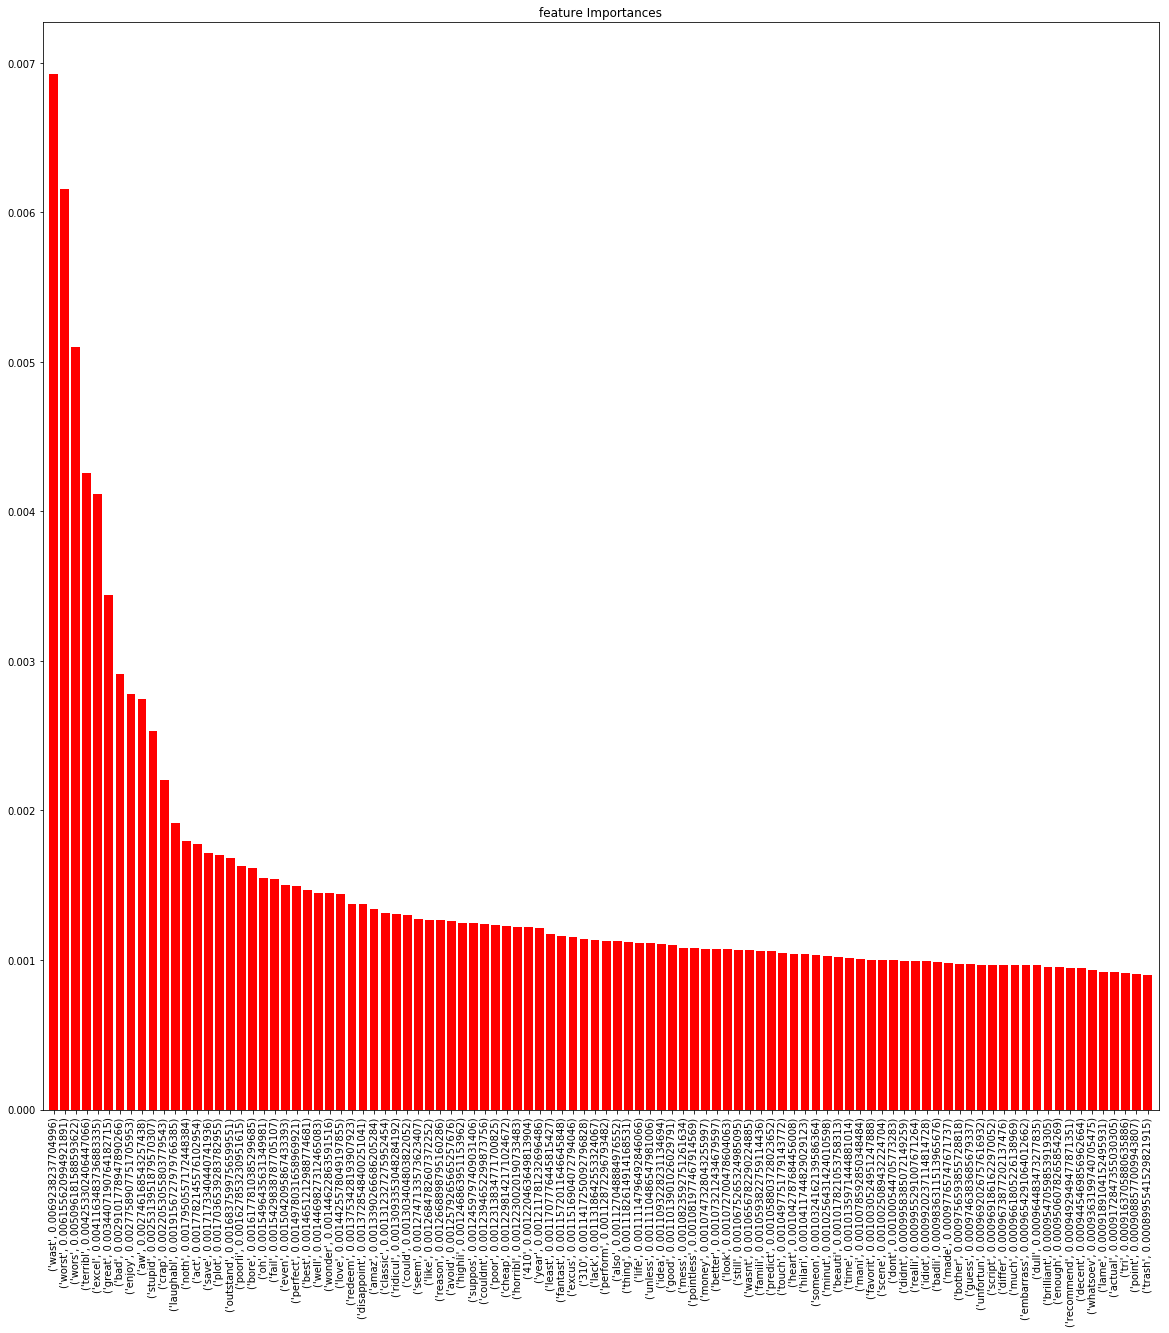

In [80]:
# Feature Selection
print_feature(df_main)

# Phase - 2 Exploration

In [15]:
# Highest frequency words in Positive
pos = df_main[df_main['Sentiment'].isin([1])].reviews_new

In [16]:
count_vect = CountVectorizer()
vect = count_vect.fit_transform(pos)

In [17]:
pos_freq = pd.DataFrame(vect.sum(axis = 0), columns = list(count_vect.get_feature_names()), index = ['frequency']).T

In [18]:
pos_freq.nlargest(10, 'frequency')

,frequency
saw,3450
fan,3442
live,3442
action,3359
direct,3359
big,3358
long,3288
must,3228
final,3216
howev,3207


In [19]:
# Highest frequency words in negative 
neg = df_main[df_main['Sentiment'].isin([0])].reviews_new

In [20]:
count_vect1 = CountVectorizer()
vect1 = count_vect1.fit_transform(neg)

In [21]:
neg_freq = pd.DataFrame(vect1.sum(axis = 0), columns = list(count_vect1.get_feature_names()), index = ['frequency']).T
neg_freq.nlargest(10, 'frequency')

,frequency
line,3628
anyth,3607
direct,3607
whole,3557
need,3455
ive,3413
big,3310
might,3293
mean,3277
kid,3273


In [46]:
#################### EXTENDING STOPWORDS DICTIONARY
words = neg_freq.nlargest(100, 'frequency').index.tolist()
stop_words.extend(words)

In [47]:
words2 = pos_freq.nlargest(100, 'frequency').index.tolist()
stop_words.extend(words2)

In [49]:
df_main['reviews_tokenized'] = df_main['reviews_new'].apply(lambda x: tokenize(x.lower()))
df_main['reviews_final'] = df_main['reviews_tokenized'].apply(lambda x: remove_stopwords(x))
df_main['reviews_final'] = df_main['reviews_final'].apply(', '.join)
df_main.head()

,Sentiment,set,reviews_new,reviews_tokenized,reviews_final
0,1,Train,"question, pedigre, tv, ive, sever, award, grip...","[question, pedigre, tv, ive, sever, award, gri...","question, pedigre, sever, award, grip, fascin,..."
1,0,Train,"grew, inspector, gadget, cartoon, kid, smart, ...","[grew, inspector, gadget, cartoon, kid, smart,...","grew, inspector, gadget, cartoon, smart, bumbl..."
2,0,Train,"draw, restraint, 9, dir, matthew, barneyhow, m...","[draw, restraint, 9, dir, matthew, barneyhow, ...","draw, restraint, 9, dir, matthew, barneyhow, m..."
3,0,Train,"howev, ladi, age, lap, doubt, opposit, sex, un...","[howev, ladi, age, lap, doubt, opposit, sex, u...","ladi, age, lap, doubt, opposit, sex, mother, u..."
4,0,Train,"must, america, guess, wasnt, style, fascin, ba...","[must, america, guess, wasnt, style, fascin, b...","america, guess, style, fascin, bare, alon, gre..."


In [50]:
################## NEW HIGH FREQUENCY POSITIVE WORDS
pos = df_main[df_main['Sentiment'].isin([1])].reviews_new
count_vect = CountVectorizer()
vect = count_vect.fit_transform(pos)
pos_freq = pd.DataFrame(vect.sum(axis = 0), columns = list(count_vect.get_feature_names()), index = ['frequency']).T
pos_freq.nlargest(10, 'frequency')

,frequency
saw,3450
fan,3442
live,3442
action,3359
direct,3359
big,3358
long,3288
must,3228
final,3216
howev,3207


In [36]:
################## NEW HIGH FREQUENCY NEGATIVE WORDS
neg = df_main[df_main['Sentiment'].isin([0])].reviews_new
count_vect = CountVectorizer()
vect = count_vect.fit_transform(neg)
neg_freq = pd.DataFrame(vect.sum(axis = 0), columns = list(count_vect.get_feature_names()), index = ['frequency']).T
neg_freq.nlargest(10, 'frequency')

,frequency
line,3628
anyth,3607
direct,3607
whole,3557
need,3455
ive,3413
big,3310
might,3293
mean,3277
kid,3273


In [51]:
df_main = df_main[['Sentiment', 'set', 'reviews_final']]

In [52]:
df_main.to_csv('df_main2.csv', index=False)

In [3]:
df_main = pd.read_csv('df_main2.csv')
df_main.head()

,Sentiment,set,reviews_final
0,1,Train,"question, pedigre, sever, award, grip, fascin,..."
1,0,Train,"grew, inspector, gadget, cartoon, smart, bumbl..."
2,0,Train,"draw, restraint, 9, dir, matthew, barneyhow, m..."
3,0,Train,"ladi, age, lap, doubt, opposit, sex, mother, u..."
4,0,Train,"america, guess, style, fascin, bare, alon, gre..."


In [4]:
df_main.reviews_final = df_main.reviews_final.values.astype('U')

In [49]:
########################### BONUS: importing unsupervised files into a DataFrame
unsup_df = read('C:\\Users\\Jatin\\Desktop\\NLP\\aclImdb_v1\\aclImdb\\train\\unsup', 'reviews')
unsup_df.head()

,reviews
0,"[I admit, the great majority of films released..."
1,"[Take a low budget, inexperienced actors doubl..."
2,"[Everybody has seen 'Back To The Future,' righ..."
3,[Doris Day was an icon of beauty in singing an...
4,"[After a series of silly, fun-loving movies, 1..."


In [50]:
############################ Cleaning Unsupervised Reviews
unsup_df['reviews_clean'] = unsup_df['reviews'].apply(', '.join)
unsup_df['reviews_nohtml'] = unsup_df['reviews_clean'].apply(lambda x: remove_html_tags(x))
unsup_df['reviews_nopunct'] = unsup_df['reviews_nohtml'].apply(lambda x: remove_punct(x))
unsup_df['reviews_tokenized'] = unsup_df['reviews_nopunct'].apply(lambda x: tokenize(x.lower()))
unsup_df['reviews_nostop'] = unsup_df['reviews_tokenized'].apply(lambda x: remove_stopwords(x))
unsup_df['reviews_lemma'] = unsup_df['reviews_nostop'].apply(lambda x: lemmatizing(x))
unsup_df['reviews_stem'] = unsup_df['reviews_lemma'].apply(lambda x: stemming(x))

unsup_df['reviews_stem'] = unsup_df['reviews_stem'].apply(', '.join)
unsup_df.head()

,reviews,reviews_clean,reviews_nohtml,reviews_nopunct,reviews_tokenized,reviews_nostop,reviews_lemma,reviews_stem
0,"[I admit, the great majority of films released...","I admit, the great majority of films released ...","I admit, the great majority of films released ...",I admit the great majority of films released b...,"[i, admit, the, great, majority, of, films, re...","[admit, great, majority, released, say, 1933, ...","[admit, great, majority, released, say, 1933, ...","admit, great, major, releas, say, 1933, dozen,..."
1,"[Take a low budget, inexperienced actors doubl...","Take a low budget, inexperienced actors doubli...","Take a low budget, inexperienced actors doubli...",Take a low budget inexperienced actors doublin...,"[take, a, low, budget, inexperienced, actors, ...","[take, low, budget, inexperienced, actors, dou...","[take, low, budget, inexperienced, actor, doub...","take, low, budget, inexperienc, actor, doubl, ..."
2,"[Everybody has seen 'Back To The Future,' righ...","Everybody has seen 'Back To The Future,' right...","Everybody has seen 'Back To The Future,' right...",Everybody has seen Back To The Future right Wh...,"[everybody, has, seen, back, to, the, future, ...","[everybody, seen, back, future, right, whether...","[everybody, seen, back, future, right, whether...","everybodi, seen, back, futur, right, whether, ..."
3,[Doris Day was an icon of beauty in singing an...,Doris Day was an icon of beauty in singing and...,Doris Day was an icon of beauty in singing and...,Doris Day was an icon of beauty in singing and...,"[doris, day, was, an, icon, of, beauty, in, si...","[doris, day, icon, beauty, singing, acting, wa...","[doris, day, icon, beauty, singing, acting, wa...","dori, day, icon, beauti, sing, act, warm, voic..."
4,"[After a series of silly, fun-loving movies, 1...","After a series of silly, fun-loving movies, 19...","After a series of silly, fun-loving movies, 19...",After a series of silly funloving movies 1955 ...,"[after, a, series, of, silly, funloving, movie...","[series, silly, funloving, 1955, big, year, do...","[series, silly, funloving, 1955, big, year, do...","seri, silli, funlov, 1955, big, year, dori, da..."


In [51]:
unsup_final = pd.DataFrame(unsup_df['reviews_stem'])
unsup_final.head()

,reviews_stem
0,"admit, great, major, releas, say, 1933, dozen,..."
1,"take, low, budget, inexperienc, actor, doubl, ..."
2,"everybodi, seen, back, futur, right, whether, ..."
3,"dori, day, icon, beauti, sing, act, warm, voic..."
4,"seri, silli, funlov, 1955, big, year, dori, da..."


In [52]:
unsup_final.to_csv('df_unsup.csv', index=False)

In [2]:
unsup_final = pd.read_csv('df_unsup.csv')
unsup_final.head()

,reviews_stem
0,"admit, great, major, releas, say, 1933, dozen,..."
1,"take, low, budget, inexperienc, actor, doubl, ..."
2,"everybodi, seen, back, futur, right, whether, ..."
3,"dori, day, icon, beauti, sing, act, warm, voic..."
4,"seri, silli, funlov, 1955, big, year, dori, da..."


In [5]:
unsup_final.shape

(50000, 1)

# Phase 3 - Visualization

In [60]:
pos1 = ' '.join(pos)

(-0.5, 799.5, 499.5, -0.5)

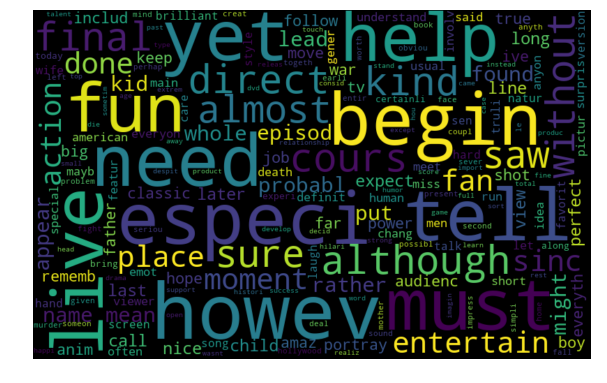

In [61]:
#Word Cloud of Positive words after cleaning
word_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos1) 
plt.figure(figsize=(10, 7)) 
plt.imshow(word_cloud, interpolation="bilinear") 
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

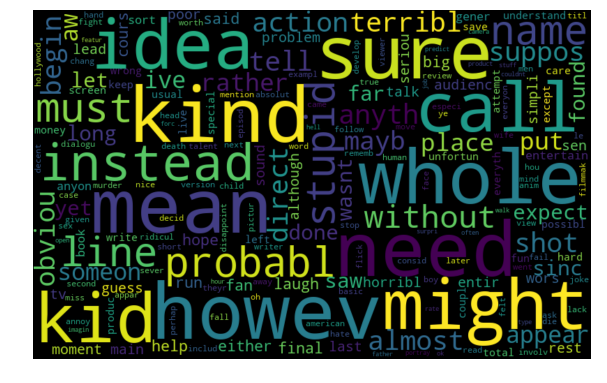

In [62]:
#Word Cloud of Negative words after cleaning
neg1 = ' '.join(neg)
word_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg1) 
plt.figure(figsize=(10, 7)) 
plt.imshow(word_cloud, interpolation="bilinear") 
plt.axis('off')

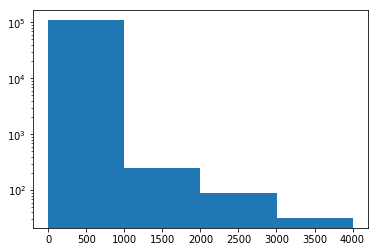

In [23]:
#Frequency Distribution in negative words
plot = vect1.sum(axis = 0).tolist()
binwidth = 1000
plt.hist(plot[0], bins = range(min(plot[0]),max(plot[0])+binwidth,binwidth), log = True);

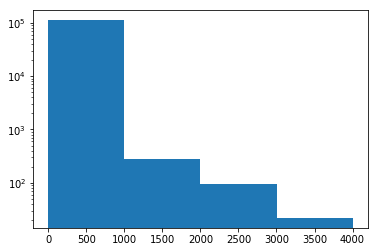

In [24]:
#Frequency Distribution in Positive words
plot1 = vect.sum(axis = 0).tolist()
binwidth = 1000
plt.hist(plot1[0], bins = range(min(plot1[0]),max(plot[0])+binwidth,binwidth), log = True);

# Phase 4 - Model Building

In [5]:
###################### Feature Generation Using Tfidf Vectorizer
tfidf_vect = TfidfVectorizer(min_df=0.0003)
tfidf = tfidf_vect.fit_transform(df_main.reviews_final)
print(tfidf.shape)

(50000, 15076)


In [6]:
counts_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())
counts_df.head()

,00,007,010,05,100,1000,10000,100000,1000000,101,...,zoey,zombi,zone,zoo,zoom,zorro,zu,zucco,zucker,zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
########################## Defining Train and Test Features
X_train = counts_df.loc[:24999,:]
X_test = counts_df.loc[25000:,:]

In [8]:
########################## Defining Train and Test Response
y_train = df_main.loc[:24999,:].Sentiment.reset_index().Sentiment
y_test = df_main.loc[25000:,:].Sentiment.reset_index().Sentiment

### Supervised Learning Models

In [9]:
########################### Using Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
pred_clf = clf.predict(X_test)
accuracy_score(y_test, pred_clf)

0.6788

In [8]:
########################## Using Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
pred_rf = rf.predict(X_test)
accuracy_score(y_test, pred_rf)

0.75784

In [72]:
########################## Using Logistic Regression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
pred_log = lr.predict(X_test)
accuracy_score(y_test, pred_log)

0.828

In [70]:
######################### Using Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
pred_mnb = mnb.predict(X_test)
accuracy_score(y_test, pred_mnb)

0.7944

### We get best accuracy using Logistic Regression i.e. 82%

### Unsupervised Learning Model

In [3]:
###################### Feature Generation Using Tfidf Vectorizer
tfidf_vect_unsup = TfidfVectorizer(max_features=5000)
tfidf_unsup = tfidf_vect_unsup.fit_transform(unsup_final.reviews_stem)
print(tfidf_unsup.shape)

(50000, 5000)


In [55]:
######################## Using K-means for creating 2 Clusters
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,random_state=10)
model.fit(tfidf_unsup)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [56]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect_unsup.get_feature_names()
for i in range(true_k):
    print('cluster %d:' % i),
    for j in order_centroids[i,:10]:
        print(' %s' % terms[j])

cluster 0:
 like
 bad
 good
 realli
 even
 dont
 time
 charact
 act
 think
cluster 1:
 great
 like
 charact
 time
 love
 good
 play
 well
 show
 life


In [12]:
########################### Using K-means to create 6 Clusters
true_k = 6
model_1 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100,n_init=3, random_state=15, n_jobs=-1)
model_1.fit(tfidf_unsup)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=3, n_jobs=-1, precompute_distances='auto',
    random_state=15, tol=0.0001, verbose=0)

In [11]:
order_centroids = model_1.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect_unsup.get_feature_names()
for i in range(true_k):
    print('cluster %d:' % i),
    for j in order_centroids[i,:10]:
        print(' %s' % terms[j])

cluster 0:
 show
 episod
 seri
 season
 like
 tv
 charact
 watch
 time
 realli
cluster 1:
 great
 love
 good
 music
 best
 time
 like
 well
 realli
 perform
cluster 2:
 life
 charact
 love
 woman
 man
 play
 like
 young
 time
 famili
cluster 3:
 bad
 worst
 act
 ever
 even
 seen
 like
 good
 wast
 time
cluster 4:
 like
 realli
 good
 charact
 dont
 even
 time
 think
 end
 look
cluster 5:
 like
 time
 good
 scene
 charact
 even
 look
 play
 plot
 much


In [4]:
########################### Using K-means to create 8 Clusters
true_k = 8
model_2 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100,n_init=5, random_state=12, n_jobs=-1)
model_2.fit(tfidf_unsup)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=8, n_init=5, n_jobs=-1, precompute_distances='auto',
    random_state=12, tol=0.0001, verbose=0)

In [5]:
order_centroids = model_2.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect_unsup.get_feature_names()
for i in range(true_k):
    print('cluster %d:' % i),
    for j in order_centroids[i,:10]:
        print(' %s' % terms[j])

cluster 0:
 great
 love
 music
 good
 time
 like
 best
 realli
 well
 seen
cluster 1:
 funni
 comedi
 laugh
 like
 joke
 good
 time
 realli
 humor
 even
cluster 2:
 like
 charact
 realli
 good
 end
 scene
 time
 even
 think
 much
cluster 3:
 show
 episod
 seri
 season
 like
 tv
 charact
 watch
 time
 realli
cluster 4:
 bad
 worst
 act
 ever
 even
 like
 seen
 good
 wast
 time
cluster 5:
 play
 like
 charact
 time
 life
 good
 scene
 man
 well
 also
cluster 6:
 book
 read
 novel
 adapt
 charact
 like
 good
 version
 much
 time
cluster 7:
 horror
 zombi
 like
 gore
 good
 realli
 dead
 even
 look
 scene


### We wil take these 8 clusters as they look good.

#### Cluster 1 = Romantic 
#### Cluster 2 = Comedy
#### Cluster 3 = Drama
#### Cluster 4 = TV Series
#### Cluster 5 = Bad Movie
#### Cluster 6 = Drama
#### Cluster 7 = Book Adaptation
#### Cluster 8 = Horror

In [12]:
test_kmean="a good love story"

In [13]:
test_kmean=test_kmean.lower().replace("[^a-z]"," ").split()
test_kmean= [word for word in test_kmean if word not in stop_words]
test_kmean=[wn.lemmatize(word) for word in test_kmean]
test_kmean= " ".join([ss.stem(word) for word in test_kmean])
test_kmean=[test_kmean]
kmean_arr=tfidf_vect_unsup.transform(test_kmean)
if model_2.predict(kmean_arr)[0]==0:
    print("The Genre is Romantic")
elif model_2.predict(kmean_arr)[0]==1:
    print("The Genre is Comedy")
elif model_2.predict(kmean_arr)[0]==2:
    print("The Genre is Drama")
elif model_2.predict(kmean_arr)[0]==3:
    print("The Genre is TV Series")
elif model_2.predict(kmean_arr)[0]==4:
    print("The Genre is Bad Movie")
elif model_2.predict(kmean_arr)[0]==5:
    print("The Genre is Drama")
elif model_2.predict(kmean_arr)[0]==6:
    print("The Genre is Book Adaptation")
elif model_2.predict(kmean_arr)[0]==7:
    print("The Genre is Horror")

The Genre is Romantic


## The End